# DIABETES PATIENT - CLASSIFICATION MODEL 

In [500]:
# importinng important libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import seaborn as  sns 
import sklearn as sn

In [501]:
# importing training dataset 
df=pd.read_csv(r"C:\Users\91879\Downloads\Training.csv")

In [502]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,0.704,27,0
2456,4,123,62,0,0,32.0,0.226,35,1
2457,1,80,74,11,60,30.0,0.527,22,0
2458,1,96,64,27,87,33.2,0.289,21,0


In [503]:
# checking the datatype of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [504]:
# checking for null values in dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Visualisation of Dataset

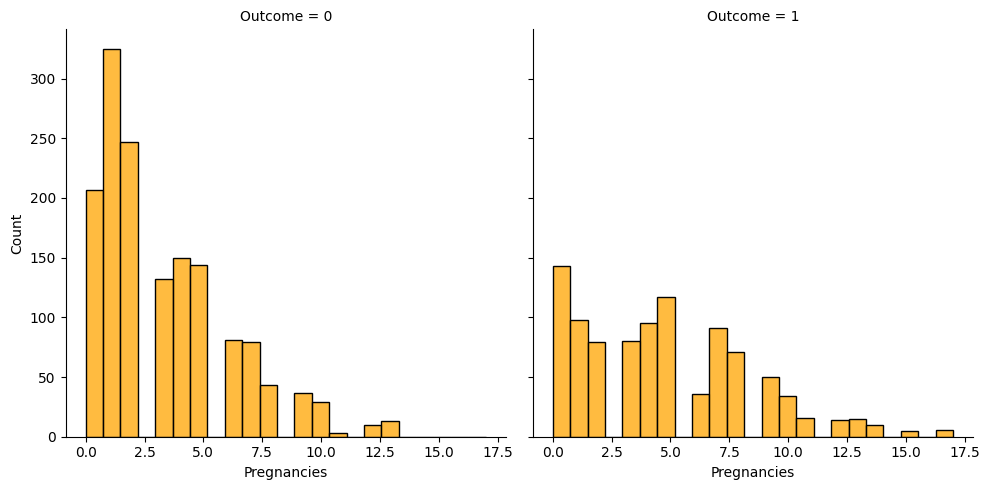

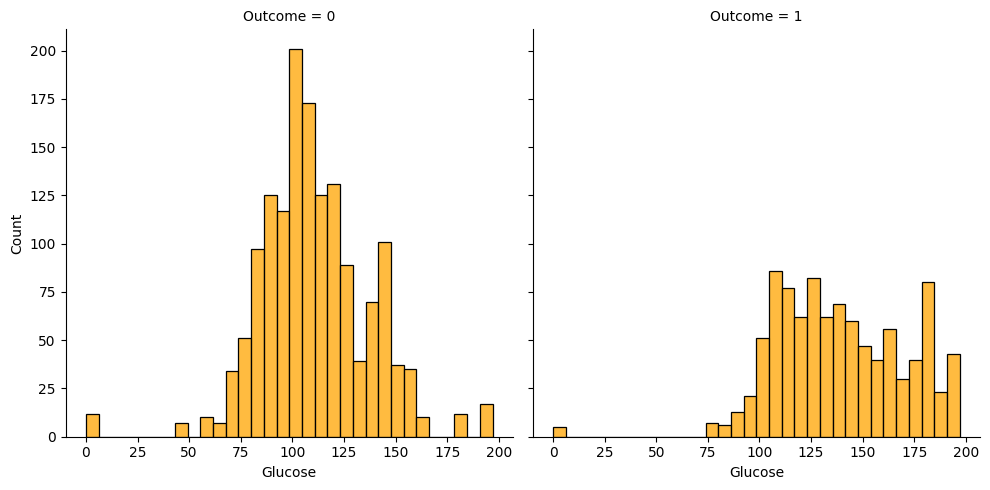

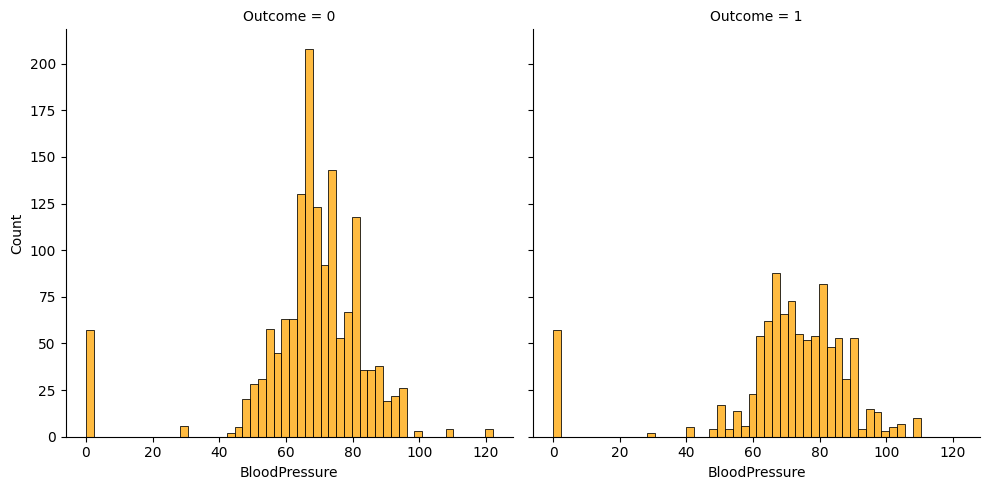

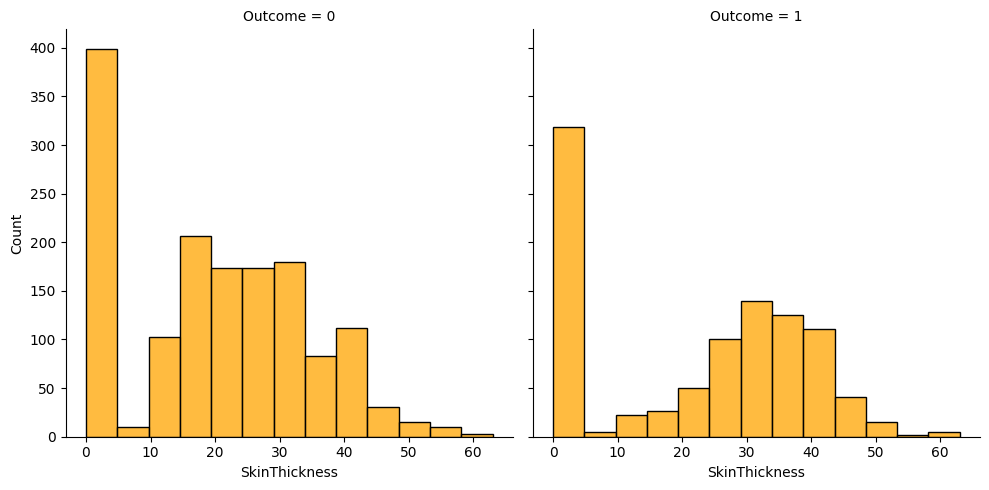

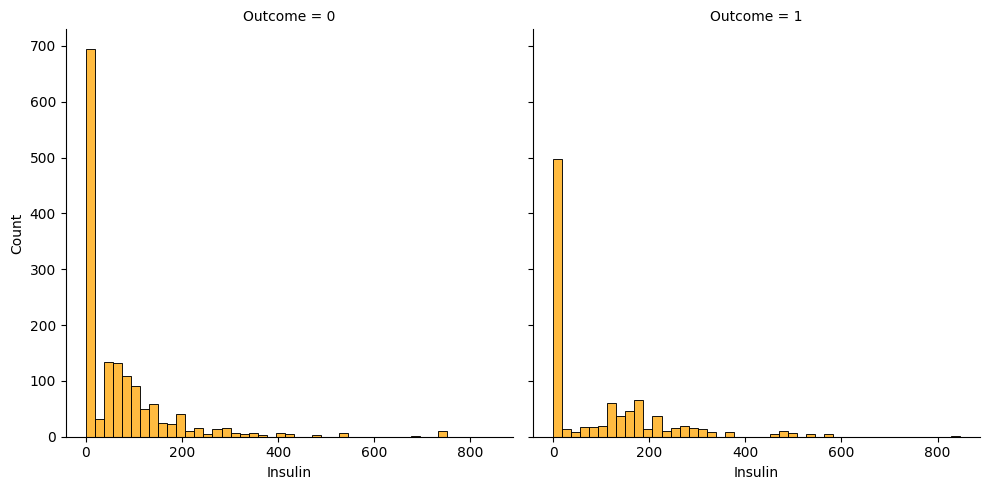

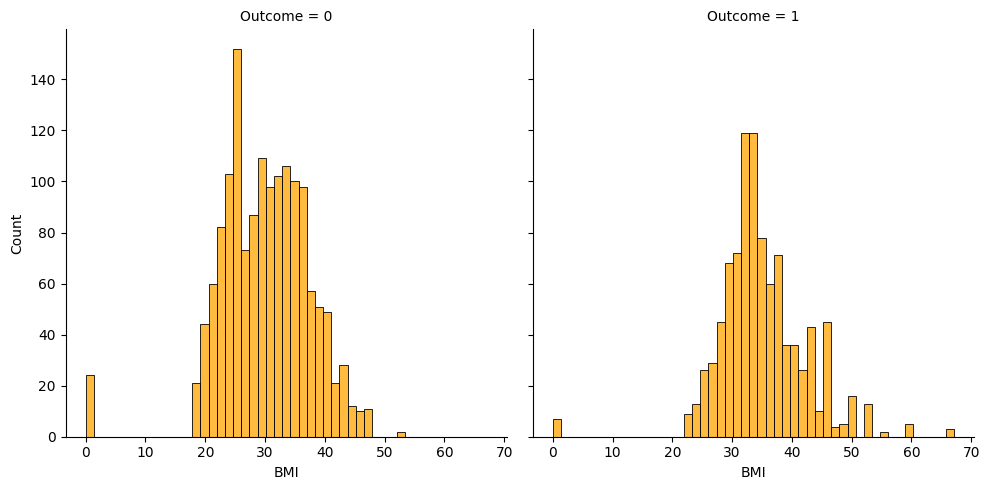

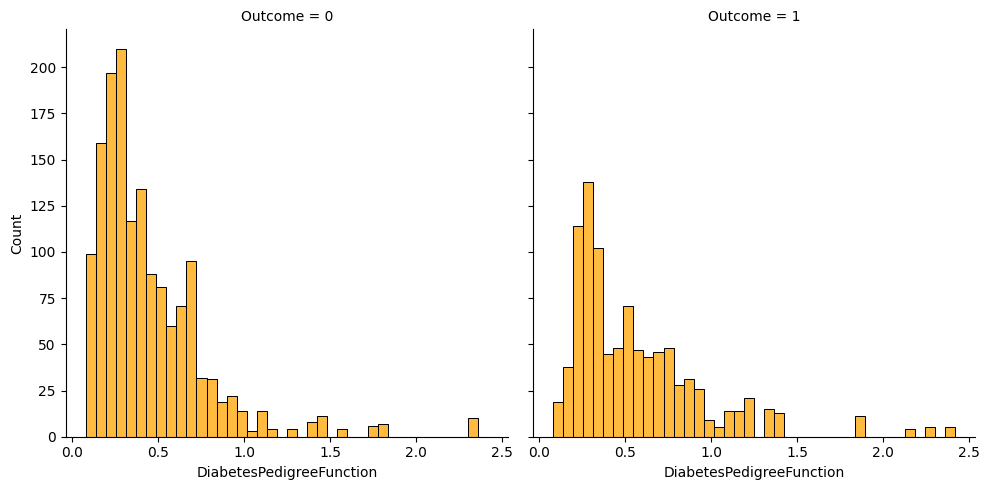

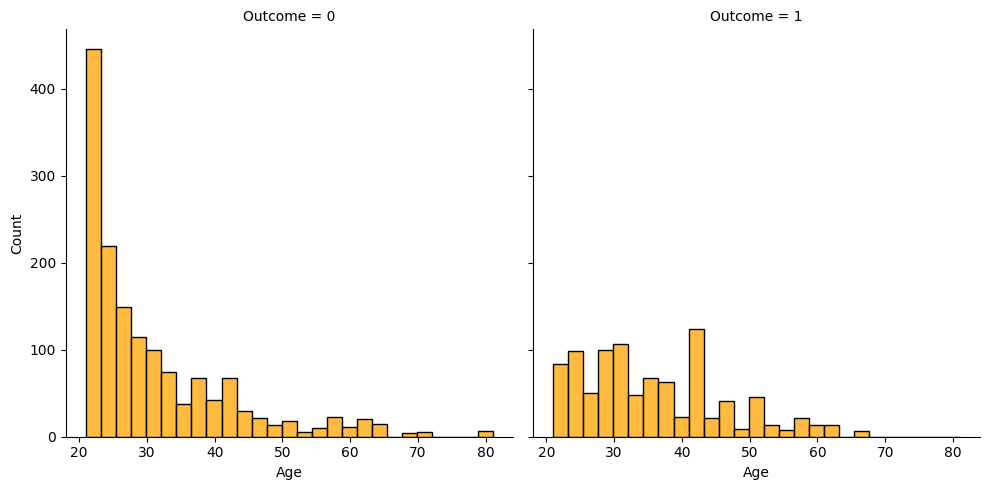

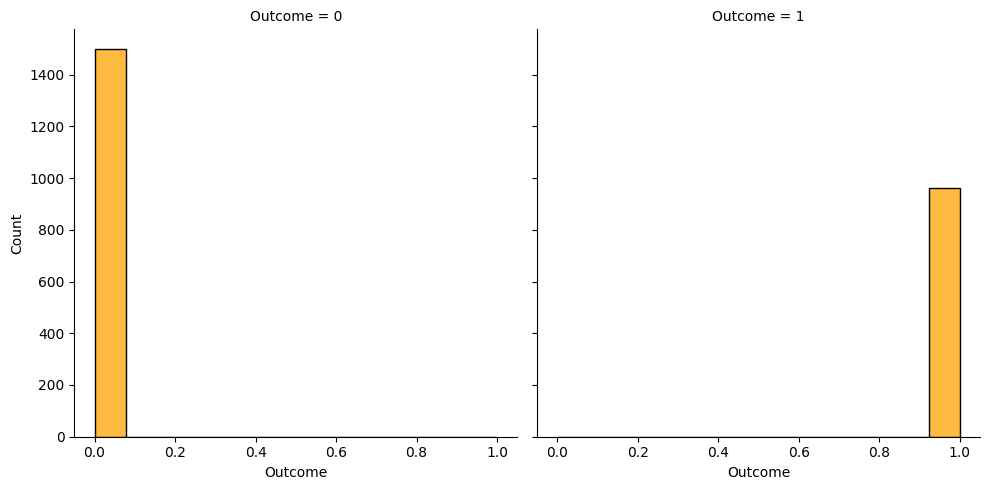

In [505]:
# Visualisation of data w.r.t outcome 
for i in df.columns:
    sns.displot(df,x=i,col="Outcome",kind="hist",color="orange")

# Feature Engineering

In [506]:
y=df["Outcome"]
x=df.drop(columns="Outcome")

In [507]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [508]:
X_train=scaler.fit_transform(x)


In [509]:
X_train.shape

(2460, 8)

# Defining an ANN (Artificial Neural Network)

In [510]:
# Importing all the functions to define an ANN(Artificial Neural Network) model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, LeakyReLU
from tensorflow.keras.layers import Dropout

In [511]:
# Defining the type of model
classifier=Sequential()

In [512]:
# Defining input layer with activation function LeakyReLU
classifier.add(Dense(units=8,activation="LeakyReLU"))

In [513]:
# Defining the first hidden layer with 15 neurons where dropout is 20% and activation function is ReLU 
classifier.add(Dense(units=15,activation="ReLU"))
classifier.add(Dropout(0.2))

In [514]:
# Defining the second hidden layer with 10 neurons where dropout is 20% and activation function is ReLU 
classifier.add(Dense(units=10,activation="ReLU"))
classifier.add(Dropout(0.2))

In [515]:
# Defining the third hidden layer with 2 neurons and activation function is ReLU 
classifier.add(Dense(units=4,activation="ReLU"))

In [516]:
# Defining the output layer with activation function is Sigmoid( due to binary classification) 
classifier.add(Dense(units=1,activation="sigmoid"))

In [517]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy


In [518]:
# Defining the optimizer to optimize the weights to  minimize the losses
# Loss Funtion : Binary Cross Entropy
# Metrics used : Accuracy
classifier.compile(optimizer="Adam",loss="binary_crossentropy", metrics=["Accuracy"])

In [519]:
# Defining the early stopping criteria
# Where it will monitor Validation Loss
# It will stop when Minimum change in validation loss will be 0.0001
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [520]:
model=classifier.fit(X_train,y, validation_split=0.3,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
173/173 [==============================] - 2s 3ms/step - loss: 0.6488 - Accuracy: 0.5883 - val_loss: 0.5900 - val_Accuracy: 0.6531
Epoch 2/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.6016 - Accuracy: 0.6312 - val_loss: 0.5580 - val_Accuracy: 0.7222
Epoch 3/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.5742 - Accuracy: 0.6847 - val_loss: 0.5361 - val_Accuracy: 0.7358
Epoch 4/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.5644 - Accuracy: 0.6852 - val_loss: 0.5282 - val_Accuracy: 0.7439
Epoch 5/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.5542 - Accuracy: 0.7044 - val_loss: 0.5201 - val_Accuracy: 0.7371
Epoch 6/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.5463 - Accuracy: 0.7178 - val_loss: 0.5130 - val_Accuracy: 0.7358
Epoch 7/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.5452 - Accuracy: 0.7073 - val_loss: 0.5103 - val_Accuracy:

In [521]:
# keys on which model focused on
model.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

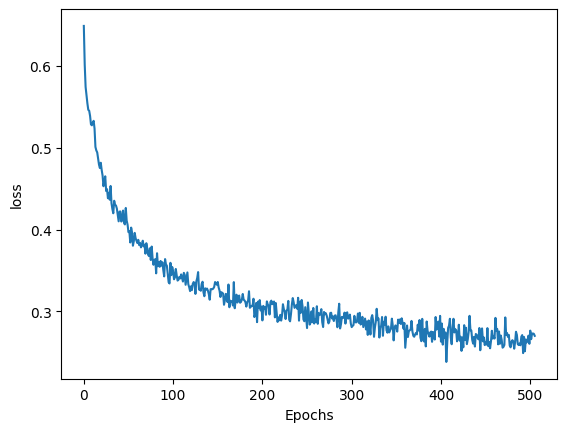

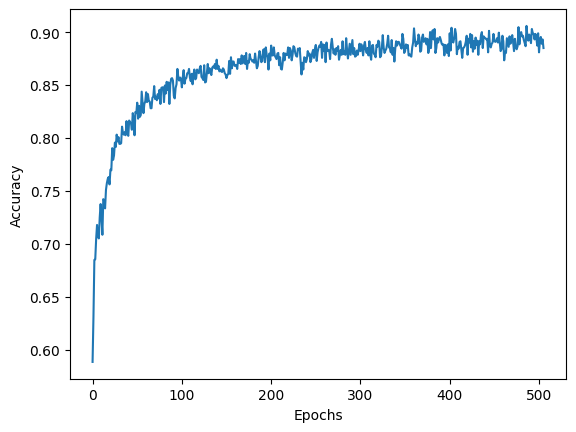

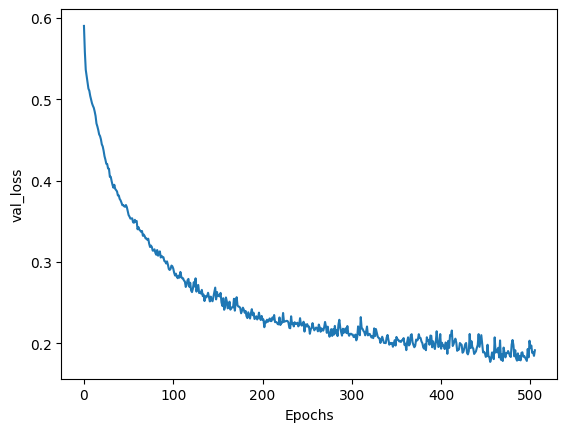

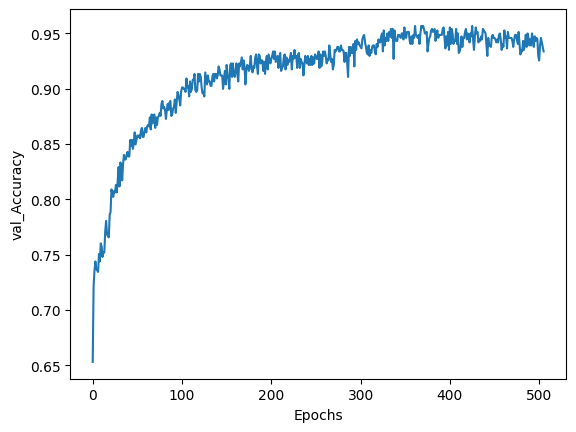

In [522]:
# Visualisation of accuracy and losses
for i in model.history.keys():
    plt.plot(model.history[i])
    plt.xlabel("Epochs")
    plt.ylabel(i)
    plt.show()

In [523]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [524]:
# Defining test dataset
test_dataset=pd.read_csv(r"C:\Users\91879\Downloads\Testing.csv")
test_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0
...,...,...,...,...,...,...,...,...,...
303,10,101,76,48,180,32.9,0.171,63,0
304,2,122,70,27,0,36.8,0.340,27,0
305,5,121,72,23,112,26.2,0.245,30,0
306,1,126,60,0,0,30.1,0.349,47,1


In [525]:
test_dataset["Outcome"].value_counts(normalize=True)*100

0    69.805195
1    30.194805
Name: Outcome, dtype: float64

In [526]:
x_test_dataset=df.drop("Outcome",axis=1)
y_test_dataset=df["Outcome"]

In [527]:
x_scaled_test_dataset=scaler.fit_transform(x_test_dataset)

In [528]:
prediction=classifier.predict(x_scaled_test_dataset)

77/77 [==============================] - 0s 891us/step


In [529]:
# Here we took dividing critera 0.3 because we want to  maximize the recall score)
prediction=(prediction>=0.3)

In [530]:
prediction

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [531]:
print(accuracy_score(y_test_dataset,prediction))

0.9280487804878049


In [532]:
print(confusion_matrix(y_test_dataset,prediction))

[[1371  129]
 [  48  912]]


In [533]:
print(f1_score(y_test_dataset,prediction))

0.911544227886057


In [534]:
print(classification_report(y_test_dataset,prediction))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1500
           1       0.88      0.95      0.91       960

    accuracy                           0.93      2460
   macro avg       0.92      0.93      0.93      2460
weighted avg       0.93      0.93      0.93      2460

